# Rad sa nedostajućim vrednostima

U svesci će biti obrađene naredne metode rada sa nedostajućim vrednostima:

1.   Izbacivanje nedostajućih vrednosti 
2.   Popunjavanje default vrednostima
3.   Forward and backward fill
4.   Mean / median fill
5.   Mean / median fill with groupby
6.   Iterative imputation

Prikazano nad [Titanic skupom](https://www.kaggle.com/datasets/yasserh/titanic-dataset).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
#titanic.info()
titanic.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

Prvo proveravamo da li u skupu postoje nedostajuće vrednosti

In [3]:
#titanic.isna()
#titanic.isna().any()
titanic.isna().any().any()

True

U skupu postoje nedostajuće vrednosti. Koliko ih ima?

In [4]:
#Broj nedostajućih vrednosti
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Izbacivanje nedostajućih vrednosti

In [5]:
#Velicina pre izbacivanja
size_with_na = len(titanic)
size_with_na

891

In [6]:
#Velicina nakon izbacivanja
size_without_na = len(titanic.dropna())
size_without_na

182

In [7]:
# Izgubili smo 80 % skupa 
size_without_na/size_with_na * 100 

20.42648709315376

Pitanje? Da li izbaciti kolone koje imaju dosta nedostajućih vrednosti (kao što su deck ili age)

## Popunjavanje default vrednostima

Još jedan naivan pristup



In [8]:
titanic['age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [9]:
titanic['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

Raspodela vrednosti... Šta izabrati kao default?

<Axes: >

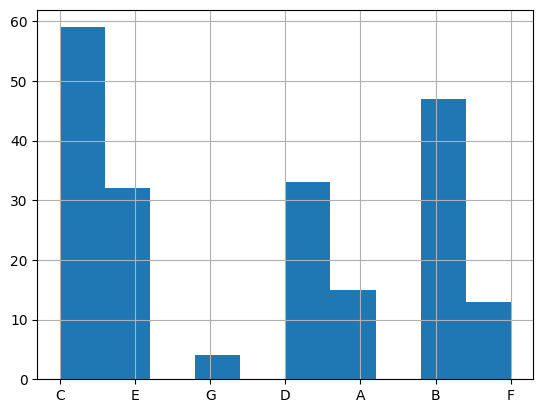

In [10]:
titanic['deck'].hist()

### Popunjavanje unapred/unazad

In [11]:
#titanic['age']
titanic['age'].ffill()
titanic['age'].bfill()
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: >

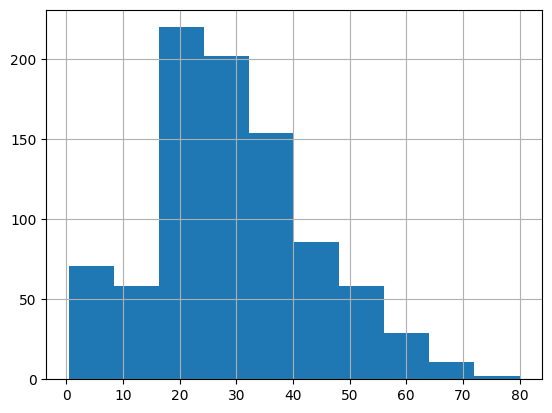

In [12]:
titanic['age'].ffill().hist()


Da li je ovo bolji pristup?

In [13]:
#Korelacija...
titanic.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


ValueError: could not convert string to float: 'male'

solution --add--> numeric_only=True

<Axes: >

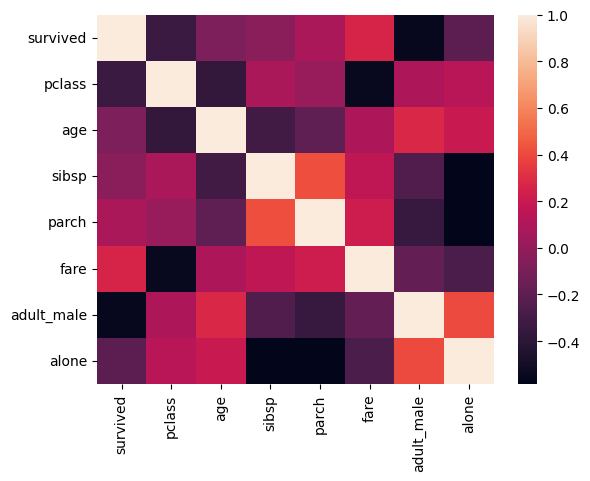

In [14]:
sns.heatmap(titanic.corr(numeric_only=True))

In [15]:
titanic[["age", "pclass"]].sort_values(by="pclass").ffill()['age']
# Na primer posmatramo age i pclass(nema nedostajuce vrednosti) --- > (nemamo bas veliku korelaciju i mozda nema smisla u ovoj situaciji... ali inace moze da bude ok pristup)

445     4.0
310    24.0
309    30.0
307    17.0
306    17.0
       ... 
379    19.0
381     1.0
382    32.0
371    18.0
890    32.0
Name: age, Length: 891, dtype: float64

In [16]:
#uporedimo rezultate ova dva pristupa
count1, _ = np.histogram(titanic[["age", "pclass"]].sort_values(by="pclass").ffill()['age'])
count, _ = np.histogram(titanic['age'].ffill())
count, count1

(array([ 71,  58, 220, 202, 154,  86,  58,  29,  11,   2], dtype=int64),
 array([ 72,  58, 231, 214, 138,  89,  48,  29,  10,   2], dtype=int64))

### Mean / median fill

<Axes: >

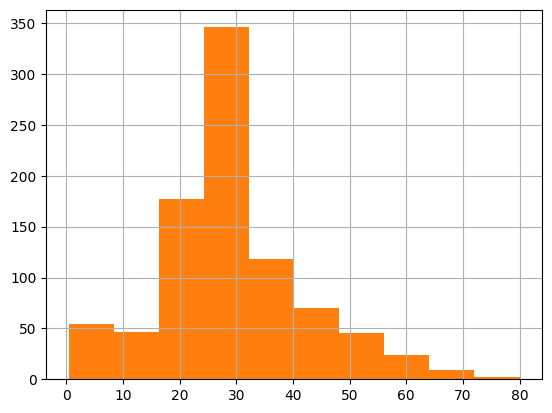

In [17]:
#problem : potenicijalno mnogo identicnih vrednosti
titanic['age'].fillna(titanic['age'].mean()).hist()
titanic['age'].fillna(titanic['age'].median()).hist()

## Mean/median with groupby 

In [18]:
# slicna intuicija kao u ffill sa pclass, samo popunjavamo srednjom vrednoscu svih iz iste grupe
titanic['age'].fillna(titanic.groupby(['pclass', 'sex'])['age'].transform('mean'))

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    21.75
889    26.00
890    32.00
Name: age, Length: 891, dtype: float64

Primer rada sa kategoričkim atributom:

In [19]:
titanic['embark_town'] = titanic['embark_town'].astype('category')
titanic['embark_town'] = titanic['embark_town'].cat.codes
titanic['embark_town'] = titanic['embark_town'].fillna(titanic.groupby(['pclass', 'alive'])['embark_town'].transform('median'))

## Iterative imputation

Iterativna imputacija predstavlja proces predviđanja nedostajuće vrednosti gde se svaki atribut modeluje kao funkcija ostalih atributa.

Svaki atribut se predviđa sekvencijalno, jedan za drugim, pri čemu se i prethodno predviđene vrednosti koriste za predviđanje.

U pitanju je _iterativni_ proces, jer se isti postupak ponavlja više puta, omogućavajući poboljšanje predviđanja nedostajućih vrednosti - jer u kasnijim iteracijama postoje predviđene vrednosti za sve atribute.




In [20]:
# Dodatna literatura: https://sci2s.ugr.es/keel/pdf/specific/congreso/2010-zhang-efficient-data-imputation-ICCI2010.pdf
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
titanic1 = titanic[['survived', 'pclass', 'age', 'sibsp', 'fare', 'embark_town']]

imptr = IterativeImputer(RandomForestRegressor(), max_iter=100, tol=0.01, random_state=0)
titanic2 = pd.DataFrame(imptr.fit_transform(titanic1), columns = titanic1.columns)
titanic2

,survived,pclass,age,sibsp,fare,embark_town
0,0.0,3.0,22.000000,1.0,7.2500,2.0
1,1.0,1.0,38.000000,1.0,71.2833,0.0
2,1.0,3.0,26.000000,0.0,7.9250,2.0
3,1.0,1.0,35.000000,1.0,53.1000,2.0
4,0.0,3.0,35.000000,0.0,8.0500,2.0
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,13.0000,2.0
887,1.0,1.0,19.000000,0.0,30.0000,2.0
888,0.0,3.0,31.942667,1.0,23.4500,2.0
889,1.0,1.0,26.000000,0.0,30.0000,0.0


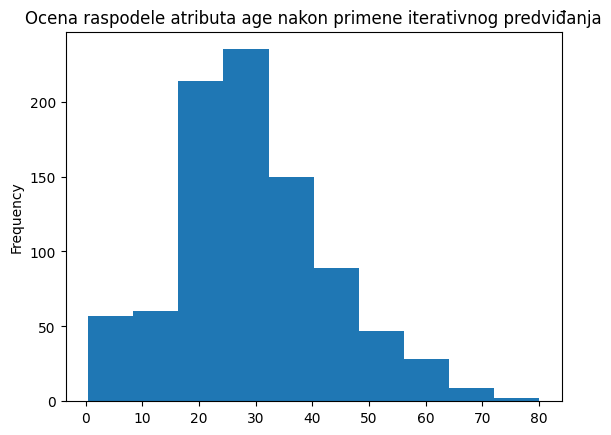

In [21]:
_ = titanic2['age'].plot(kind='hist', title='Ocena raspodele atributa age nakon primene iterativnog predviđanja')